# Module 3 - Python and DICOM

The aim of this module is to give clinicians an introduction into the DICOM file format, what type of data is represented in this file format, and how to extract basic 2D and 3D image data from these files. 

***N.B.** The interpretation of images in any form will not be covered in this unit.*

## Seminar

By the end of the seminar, clinicians should:

-   Understand the aims of this module (LL4)
-   Basics of image representation (LL2)
    -   Understand what a pixel is (LL2)
    -   Understand what a voxel is, by extension (LL2)
    -   Greyscale images
        -   Understand what values greyscale values are are usually given in (0.0-1.0, 0-255, HU) (LL2)
        -   Understand what a Houndsfield Unit is (LL2)
    -   Colours
        -   Understand how RGB data is used to represent most images (LL2)
        -   Understand what a colourmap is and when it is used (LL2)
-   The DICOM format
    -   Know the history of the DICOM standard and why it was introduced (LL4)
    -   Understand what information is contained within a DICOM file (LL2)
    -   Understand that DICOM is a lossless standard (LL2)
    -   Understand broadly how a DICOM file stores image data (both 2D and 3D) (LL2)
    -   Understand why Pydicom is a useful tool for clinicians (LL4)
-   Understand what considerations are needed when coding in Python to convert images, with interactive questions (array shapes) (LL3)
-   Understand the difference between volumetric 3D images and 3D meshes and what is needed to convert between them (segmentation)
-   Understand the basics of image segmentation in 2D and 3D (LL2)
-   Understand where volumetric imaging is used and where mesh reconstructions are used in clinical medicine (LL4)

## Workshop

By the end of the workshop, clinicians should be:

-   Open a DICOM file with Python (LL1)
-   Scan information
    -   Understand that there are three different types of element in a DICOM file (LL2)
    -   Understand different ways to access elements (by hex tag and keyword) (LL2)
    -   Extract basic scan information by keyword e.g. `PatientName` (LL1)
-   Image extraction
    -   Understand what data is needed to accurately reconstruct data from a DICOM study for 3D and 2D images (image shape, slice indices) (LL1)
    -   Extract 2D image data into a NumPy array using `ds.pixel_array` (LL1)
    -   Extract 2D colourmap data (*e.g. Doppler flow rate data*) and plot this appropriately (LL1)
    -   Reconstruct 3D image from a DICOM study and [plot axial, sagittal and coronal views](https://pydicom.github.io/pydicom/stable/auto_examples/image_processing/reslice.html#sphx-glr-auto-examples-image-processing-reslice-py) (LL1)
    -   Preprocess the image for display in Python (LL1)
    -   Plot image data from a DICOM file in Python (LL1)

We need a candidate DICOM study/studies for this portion of the course. Options include: 
- [Patient Contributed Image Repository](https://www.pcir.org/) - This is where Pydicom gets it's official example studies. 
- Pydicom's official test files

We need the following studies: 
- 2D basic scan (e.g. CXR) 
- 3D volumetric scan (e.g. CT head)

*We could also add an extra section to the end to work with colourmaps. This would need imaging with colour data - e.g. ultrasound with flow data.*


# Module 3: Python and DICOM 
![image1](/workspaces/coding-hands-on/dair/module_3/images/image1.jpg)
1. What is an array?
2. Introduction to Image data and pixels
3. Housefield units
4. Dicom files : what are they and why?
5. Volumetric imaging and voxels




## 1. What is an Array?

- **Definition**: An array is a **collection of elements** (usually numbers) stored in a **grid-like structure**.
- Arrays can be **1D (like a list)** or **multi-dimensional** (2D, 3D, etc.).
- Used to store and organize data for **efficient processing**.
- In Python, arrays are commonly handled using **NumPy**

![anatomy of arrays](/workspaces/coding-hands-on/dair/module_3/images/image2.JPG)

In [1]:
import numpy as np 
## arrays can be take on different sizes, shapes and dimensions 

one_dim_array=np.array([1,2,3,4,5,6,7,8])
two_dim_array=np.array([[1,2,3,4],
[5,6,7,8]])
three_dim_array=np.array([[1,2],[3,4],[5,6],[7,8]])

print(f"One Dimensional array (aka vector): \n{one_dim_array} \nshape: {one_dim_array.shape} \nsize :{one_dim_array.size}\n")
print(f"Two Dimensional array: \n{two_dim_array} \nshape: {two_dim_array.shape} \nsize :{two_dim_array.size}\n")
print(f"Three Dimensional array: \n{three_dim_array} \nshape: {three_dim_array.shape} \nsize :{three_dim_array.size}")

One Dimensional array (aka vector): 
[1 2 3 4 5 6 7 8] 
shape: (8,) 
size :8

Two Dimensional array: 
[[1 2 3 4]
 [5 6 7 8]] 
shape: (2, 4) 
size :8

Three Dimensional array: 
[[1 2]
 [3 4]
 [5 6]
 [7 8]] 
shape: (4, 2) 
size :8


### 1.0 Why Numpy ?
* numpy is built using a faster programming language called C and thus does computations much faster than python computations which comes in handy especially when data is larger 
* numpy is also fast because it uses something called broadcasting 
* using numpy arrays instead of lists is faster and consumes less space in memory -- broadcasting (will explain in a bit)

Numpy Documentation :https://numpy.org/doc/stable/index.html


#### Creating Numpy Arrays 
    np.array()
    np.arange()
    np.ones()
    np.zeros()
    np.random.rand()
    np.random.randint()
    np.random.randn()
    np.random.seed() - pseudo random numbers 
    np.linspace()

### 1.1 What can we do with arrays?
**Pretty Much Anything !!**

**Arithmetic**
* +, -, *, /, //, **, %
* np.exp()
* np.log()
* Dot product - np.dot()
* Broadcasting

**Aggregation**
* np.sum() - faster than .sum(), make demo, np is really fast
* np.mean()
* np.std()
* np.var()
* np.min()
* np.max()
* np.argmin() - find index of minimum value
* np.argmax() - find index of maximum value

**Reshaping**
* np.reshape()
* Transposing
    - array.T
    
**Comparison operators**
* ">"
* "<"
* "<="
* ">="
* x != 3
* x == 3

In [20]:
print(f"One Dimensional array (aka vector): \n{one_dim_array} \nSum: {np.sum(one_dim_array)} \nMean :{np.mean(one_dim_array)}\nAll multiplied by 2:\n  {one_dim_array*2}\nWhether any of the numbers are equal to 2:\n  {one_dim_array==2}")


One Dimensional array (aka vector): 
[1 2 3 4 5 6 7 8] 
Sum: 36 
Mean :4.5
All multiplied by 2:
  [ 2  4  6  8 10 12 14 16]
Whether any of the numbers are equal to 2:
  [False  True False False False False False False]


### 1.3 Numpy Broadcasting
**Definintion**: Broadcasting is the ability to perform computations on or using arrays without the need to use for loops even if arrays were not of the same exact shape

**Broadcasting Rules**

*To broadcast two arrays together, some rules must apply:*
 

* If the arrays don’t have the same rank then prepend the shape of the lower rank array with 1s until both shapes have the same length.
* The two arrays are compatible in a dimension if they have the same size in the dimension or if one of the arrays has size 1 in that dimension.
* The arrays can be broadcast together if they are compatible with all dimensions.
* In any dimension where one array had size 1 and the other array had size greater than 1, the first array behaves as if it were copied along that dimension.

![broadcasting of arrays](/workspaces/coding-hands-on/dair/module_3/images/image3.gif)


In [1]:
## let us demonstrate broadcasting 
array1=np.ones((2,3))
array2=np.full((3, 3), 2)

print(f"array1  of shape {array1.shape}:\n {array1}\n\narray 2 of shape {array2.shape}:\n {array2}")
try:
    print(f"\narray1 x array2 : {array1*array2}")
    print("No Errors!!-- Broadcasting!!")
except:
    print("\n\n**Shapes incompatible**")
    raise 


NameError: name 'np' is not defined

### Answer With Me !!

![meme](/workspaces/coding-hands-on/dair/module_3/images/image7.jpg)

Considering rules of broadcasting mathmetical operations between arrays of the following specified shapes , which would yield an error and which is compatible ?
    
    Answer
    (2,1) , (1,) ---> 
    (5,5,3), (2,5,3) -->
    (5,5,3), (5,3) -->
    (3,3,4), (4,)-->


## 2. Introduction to Image Data and Pixels
Images, at core, are but arrays. Images can be 2-dimensional or 3-dimensional. Every item of an array is what we call a **Pixel** in images. 

![pixels and arrays](/workspaces/coding-hands-on/dair/module_3/images/image4.png)

Images can have only two dimensions **(width , height)** . Those are likely black and white images. The the larger was the value of the pixel the brighter it appeared.  In black and white images , aka **grayscale** , the pixel values ranges can differ.

* **8-bit grayscale image**: The most common format for grayscale images. Each pixel can have a value ranging from 0 to 255, where: 0 represents black (no light),255 represents white (full intensity of light), and values in between represent varying shades of gray.

For other bit depths:
* **1-bit image**: Each pixel can be either 0 (black) or 1 (white).
* **16-bit image**: Each pixel value ranges from 0 to 65,535, allowing for finer gradations of gray, often used in medical imaging and other high-precision fields.

![pixels and RGB](/workspaces/coding-hands-on/dair/module_3/images/image5.png)

Colored images on the other hand have three dimensions with a 2D array for every color channel : Red , Green , Blue -- **(width,height,channel)**


We will need another package going forward the great **OpenCV** !
Please run the following line on your terminal to install the package:
*pip install opencv-python*

**Anlayzing the last time I was able to do a pushup!**


![funny image of young me](/workspaces/coding-hands-on/dair/module_3/images/image6.jpg)


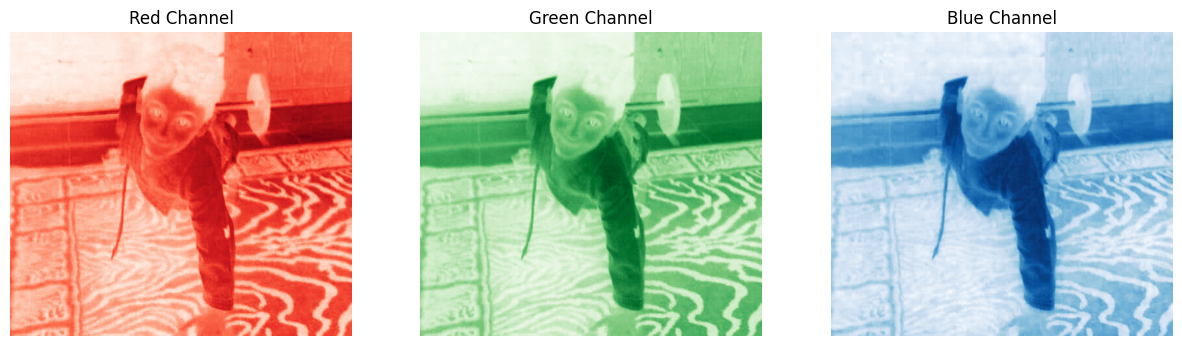

In [9]:
#But how do arrays relate to images?
import cv2 #this is opencv importing 
import matplotlib.pyplot as plt # this a package for plotting 



# Read the image using OpenCV (which loads the image in BGR format)
image = cv2.imread('/workspaces/coding-hands-on/dair/module_3/images/image6.jpg')
# Convert the image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Split the image into R, G, B channels
R, G, B = cv2.split(image_rgb)

# Plot all three channels
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(R, cmap='Reds')
ax[0].set_title('Red Channel')
ax[0].axis('off')

ax[1].imshow(G, cmap='Greens')
ax[1].set_title('Green Channel')
ax[1].axis('off')

ax[2].imshow(B, cmap='Blues')
ax[2].set_title('Blue Channel')
ax[2].axis('off')

plt.show()


In [11]:
print(f"This is the array of the image with shape of {image_rgb.shape} reshaped to (3,467,525):\n\n{image_rgb.reshape(3,467,525)}")


This is the array of the image with shape of (467, 525, 3) reshaped to (3,467,525):

[[[ 21  25  34 ...  42  34  32]
  [ 40  35  32 ... 121 106  67]
  [119 104  65 ... 115  99  63]
  ...
  [168 164 178 ... 208 209 204]
  [137 151 151 ... 139 167 204]
  [146 178 216 ... 178 176 189]]

 [[163 159 173 ... 208 209 204]
  [140 154 154 ... 143 169 206]
  [151 181 219 ... 182 180 193]
  ...
  [ 69  70  72 ...  83  84  86]
  [ 91  91  91 ...  50  54  27]
  [ 65  70  38 ...  63  64  69]]

 [[ 63  63  63 ...  94  96  95]
  [103 103 103 ...  54  58  31]
  [ 70  75  43 ...  59  58  63]
  ...
  [120 122 108 ...  46  45  50]
  [ 44  46  45 ...  97 105  94]
  [ 81  88  80 ... 136 147 131]]]


# 3. HounsField Units
 While pixel values and ranges in grayscale images apply for MRIs (signal intensity) , Ultrasound (echo intensity) and Xrays (xray attentuation), CT scans are different and values stored usually follow a differnt scale -- **Enter Hounsfield Units**.

 While MRIs and US are qualitative or semi-quantitative, CT scans are more quantitative and measure a physical propert : the **attentuation of xrays** through different structures and organs of the body across multiple **slices**.

 In the early 1970s, **Sir Godfrey Newbold Hounsfield** , a British electrical engineer presented the world with Hounsfiled Units which he won the **Nobel Prize** for several years later. 

 ![Sir Hounsfield](/workspaces/coding-hands-on/dair/module_3/images/image8.jpg)

 The idea of Hounsfield units is using **water as a reference point** , a center at **0 HU (Hounsfield Units)** for xray attenuation with structures that pass xray-beams more (less attenuation) will hold negative values and structures that pass less xray beams through (high attenuation) will hold positive values. 


| Tissue Type      | Hounsfield Unit (HU) Range  |
|------------------|----------------------------|
| Air              | -1000 HU                    |
| Fat              | -100 to -50 HU              |
| Water            | 0 HU                        |
| Soft Tissue      | +40 to +80 HU               |
| Bone             | +700 to +3000 HU            |

 
Quantitatively measuring how xrays are attentuated allows for interesting medical and computational applications. Notably, HU allow for filtering out certain structures by defining a centre HU value (aka **level**) and range (aka **window**) beyond which values are filtered, this is called **windowing**.

### Windowing in Hounsfield Units (HU) for CT Imaging

| **Tissue Type**      | **Window Level (WL)** | **Window Width (WW)** | **Description**                           |
|----------------------|-----------------------|-----------------------|-------------------------------------------|
| **Air**              | -600 HU               | 1500 HU               | Optimizes visualization of air-filled structures (e.g., lungs).   |
| **Fat**              | -100 HU               | 350 HU                | Enhances contrast for fatty tissues.     |
| **Soft Tissue**      | 40 HU                 | 400 HU                | Best for visualizing soft tissues (e.g., muscle, organs).          |
| **Bone**             | 300 HU                | 2000 HU               | Highlights bony structures and calcifications.                      |
| **Lung**             | -500 HU               | 1500 HU               | Adjusted for optimal lung imaging, focusing on air and interstitial structures. |
| **Brain**            | 40 HU                 | 80 HU                 | Effective for brain tissue evaluation, differentiating gray and white matter. |
| **Tumor**            | 100 HU                | 400 HU                | Useful for assessing the density and borders of tumors.            |


![windowing generally](/workspaces/coding-hands-on/dair/module_3/images/windowing.png)


*This is the part where we shift to 3Dslicer and have some fun :)*

# 4. DICOM Files : What Are They and Why?

**DICOM (Digital Imaging and Communications in Medicine)** is a standard for storing and transmitting medical images.
It was developed to ensure interoperability between medical imaging devices like CT, MRI **(stored as 3D images)** , as well as xray and ultrasound **(stored as 2D images)** and healthcare systems. Unlike JPEG, PNG or other file formats, DICOM files do not only include images but also data about the image stored -- **metadata**.

Such metadata can be patient's name, referring hospital, patient sex etc. as well as information about paramaters of image aquisition such as slice thickness, protocol , position of patient etc. 


### Some Important DICOM Tags

| **Tag**            | **Element Name**                        | **Description**                                                |
|--------------------|-----------------------------------------|---------------------------------------------------------------|
| `(0010,0010)`      | Patient's Name                         | The name of the patient.                                     |
| `(0010,0020)`      | Patient ID                             | A unique identifier for the patient.                         |
| `(0010,0030)`      | Patient's Birth Date                   | The birth date of the patient.                               |
| `(0010,0040)`      | Patient's Sex                          | The gender of the patient (M/F).                             |
| `(0008,0020)`      | Study Date                            | The date the study was performed.                            |
| `(0008,0030)`      | Study Time                            | The time the study was performed.                            |
| `(0008,0050)`      | Accession Number                       | A unique identifier assigned to a study for billing or tracking. |
| `(0008,0070)`      | Manufacturer                           | The manufacturer of the imaging equipment.                   |
| `(0008,0080)`      | Institution Name                       | The name of the institution performing the imaging study.    |
| `(0020,000D)`      | Study Instance UID                     | A unique identifier for the study instance.                  |
| `(0020,000E)`      | Series Instance UID                    | A unique identifier for the series within the study.         |
| `(0020,0010)`      | Study ID                               | An identifier for the study, often generated by the system.  |
| `(0008,1030)`      | Study Description                      | A description of the study performed.                        |
| `(0018,0050)`      | Slice Thickness                        | The thickness of the slices in mm (for CT or MRI).         |
| `(0028,0010)`      | Rows                                   | The number of rows in the image (image dimension).          |
| `(0028,0011)`      | Columns                                | The number of columns in the image (image dimension).       |
| `(0008,0016)`      | SOP Class UID                          | The unique identifier for the type of object in the DICOM file. |
| `(0008,0018)`      | SOP Instance UID                       | A unique identifier for the specific instance of the object.  |


Another key value of DICOM is **standardization** allowing a common framework for managing, storing, and sharing medical images across different devices and platforms which would in turn allow for it's easy use and integration into electronic health records and PACs (Picture Archive Communication System). Finally, a core feature of DICOM that might be as prominent in JPEG and PNG is the capacity for **lossless compression** meaning that it can be compressed without losing information or quality when extracted back. 

In  python you can play around with DICOM files creating visuals, reconstructing different planes, accessing  metadata, windowing to highlight certain structures and more. A specific package has been developed for DICOM in python and you can try out yourself , in your terminal type the following commmad to install **Pydicom**:
    ```
    pip install pydicom
    ```

I created this gif  out of CT scan dicom files using pydicom and  a couple other packages:

![dicom gif](/workspaces/coding-hands-on/dair/module_3/images/dicom_slices.gif)

This is the same gif but lung window instead 

![lung window gif](/workspaces/coding-hands-on/dair/module_3/images/lung_windowed_slices.gif)

Another version of the same gif but soft tissue window 

![soft window gif](/workspaces/coding-hands-on/dair/module_3/images/soft_tissue_windowed_slices.gif)



In [1]:
import pydicom
import pandas as pd 
sample_dcm=pydicom.dcmread("/workspaces/coding-hands-on/dair/module_3/images/dicom_sample_slice.dcm")

In [4]:
for element in sample_dcm:
    print(f"Tag: {element.tag} | Name: {element.name} | VR: {element.VR}")

Tag: (0008,0008) | Name: Image Type | VR: CS
Tag: (0008,0016) | Name: SOP Class UID | VR: UI
Tag: (0008,0018) | Name: SOP Instance UID | VR: UI
Tag: (0008,0020) | Name: Study Date | VR: DA
Tag: (0008,0021) | Name: Series Date | VR: DA
Tag: (0008,0022) | Name: Acquisition Date | VR: DA
Tag: (0008,0023) | Name: Content Date | VR: DA
Tag: (0008,0030) | Name: Study Time | VR: TM
Tag: (0008,0031) | Name: Series Time | VR: TM
Tag: (0008,0032) | Name: Acquisition Time | VR: TM
Tag: (0008,0033) | Name: Content Time | VR: TM
Tag: (0008,0050) | Name: Accession Number | VR: SH
Tag: (0008,0054) | Name: Retrieve AE Title | VR: AE
Tag: (0008,0060) | Name: Modality | VR: CS
Tag: (0008,0070) | Name: Manufacturer | VR: LO
Tag: (0008,0090) | Name: Referring Physician's Name | VR: PN
Tag: (0008,1010) | Name: Station Name | VR: SH
Tag: (0008,1030) | Name: Study Description | VR: LO
Tag: (0008,103E) | Name: Series Description | VR: LO
Tag: (0008,1080) | Name: Admitting Diagnoses Description | VR: LO
Tag: (

**VR** in dicom is the **value representation** or data type in other words of each dicom element in the metadata aka **Tag**

### Common value representations:

| **VR**  | **Description**                                    | **Data Type**         |
|---------|----------------------------------------------------|-----------------------|
| **PN**  | **Person Name**: Stores a person’s name            | String (multi-part)   |
| **DA**  | **Date**: Represents a date (e.g., study date)     | Date (YYYYMMDD)       |
| **TM**  | **Time**: Represents time (e.g., study time)       | Time (HHMMSS)         |
| **LO**  | **Long String**: Limited-length string             | String (up to 64 chars)|
| **CS**  | **Code String**: A coded or predefined value       | String                |
| **IS**  | **Integer String**: Integer represented as a string| String (only digits)  |
| **DS**  | **Decimal String**: Decimal numbers                | String (decimal format)|
| **FL**  | **Floating Point Single**: 4-byte floating number  | 32-bit float          |
| **FD**  | **Floating Point Double**: 8-byte floating number  | 64-bit float          |
| **US**  | **Unsigned Short**: 16-bit unsigned integer        | 16-bit int            |
| **UL**  | **Unsigned Long**: 32-bit unsigned integer         | 32-bit int            |
| **SQ**  | **Sequence of Items**: Represents a sequence of DICOM elements | Sequence (nested data) |
| **SH**  | **Short String**: Limited length string (up to 16 chars) | String (e.g., hospital name) |


In [7]:
## create a pandas data frame 
tags=[]
names=[]
VRs=[]
for element in sample_dcm:
    tags.append(element.tag)
    names.append(element.name)
    VRs.append(element.VR)

df=pd.DataFrame({"Tag":tags,"Name":names,"VR":VRs})
df

,Tag,Name,VR
0,524296,Image Type,CS
1,524310,SOP Class UID,UI
2,524312,SOP Instance UID,UI
3,524320,Study Date,DA
4,524321,Series Date,DA
...,...,...,...
112,3280944,Reason for Study,LO
113,3280992,Requested Procedure Description,LO
114,3280996,Requested Procedure Code Sequence,SQ
115,3293184,Study Comments,LT


# 5. Volumetric Imaging and Voxels


### What are Voxels?

- **Voxel** (short for "volumetric pixel") is the 3D counterpart of a pixel.
- In medical imaging, voxels represent a **volume** of tissue in a scanned 3D space.
- Each voxel contains a value that corresponds to the measured property of that volume, such as **tissue density** or **intensity**.


- Voxel size depends on the **spatial resolution** of the imaging technique and the **slice thickness**.
- Smaller voxels provide **higher resolution** images but may require more data and longer scan times.
- The size of a voxel is determined by:
  - **Slice thickness** (z-axis)
  - **Pixel size** in the x-y plane

- The value in each voxel helps reconstruct a 3D representation of organs and tissues.
- Each voxel value contributes to creating **3D visualizations** or performing quantitative measurements, such as tissue volume or density.

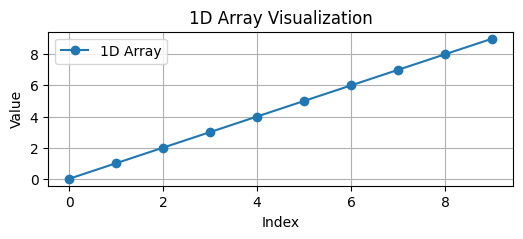

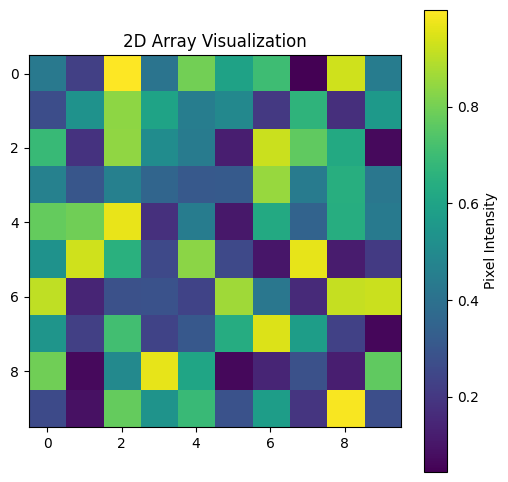

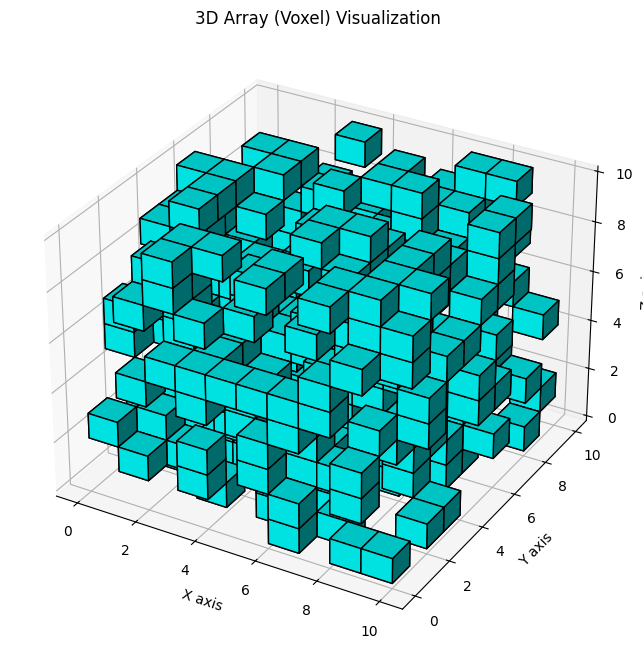

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1D Array Visualization
def visualize_1d_array():
    array_1d = np.arange(10)  # A simple 1D array with values from 0 to 9
    plt.figure(figsize=(6, 2))
    plt.plot(array_1d, 'o-', label='1D Array')
    plt.title("1D Array Visualization")
    plt.xlabel("Index")
    plt.ylabel("Value")
    plt.grid(True)
    plt.legend()
    plt.show()

# 2D Array Visualization
def visualize_2d_array():
    array_2d = np.random.rand(10, 10)  # Random 2D array (10x10 matrix)
    plt.figure(figsize=(6, 6))
    plt.imshow(array_2d, cmap='viridis', interpolation='none')
    plt.colorbar(label="Pixel Intensity")
    plt.title("2D Array Visualization")
    plt.show()

# 3D Array (Voxel) Visualization
def visualize_3d_voxel_array():
    # Create a 3D array (10x10x10) filled with random binary values (0s and 1s)
    array_3d = np.random.rand(10, 10, 10) > 0.7  # Thresholding to get binary array (1s and 0s)
    
    # Create a figure for 3D voxel visualization
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the voxels
    ax.voxels(array_3d, facecolors='cyan', edgecolor='k')

    # Labeling the axes
    ax.set_title("3D Array (Voxel) Visualization")
    ax.set_xlabel('X axis')
    ax.set_ylabel('Y axis')
    ax.set_zlabel('Z axis')
    
    plt.show()

# Visualize 1D, 2D, and 3D arrays
visualize_1d_array()
visualize_2d_array()
visualize_3d_voxel_array()


### Similary you can make use of the 3D nature of CT scans and create 3D reconstruction of the scan 
![3D reconstrcution](/workspaces/coding-hands-on/dair/module_3/images/3d_visualisation.gif)